In [1]:
import sys
from pathlib import Path
current = Path(Path().resolve())
sys.path.append(str(current))
sys.path.append(str(current.parents[1]))

from enum import *
from pricer import *

import matplotlib.pyplot as plt

QuantCourseBP 9fdfd3dc49239f151ef1fce2c3a94c059fb7b17f*


In [2]:
# stock ~ BCB
BCB_stock = Stock.BLUECHIP_BANK
# free parameters
# strike price of the digital contract
K_digital = 150
K_bull = 150
# maturity
T = 1
# for digital contract only
pp = 1

In [3]:
# my market model
my_model = MarketModel(BCB_stock)

In [4]:
# range of spot pricer
SpotPrices = np.linspace(100, 200, 1001)
# gaps in strike prices in the bull spread contracts
gaps = np.linspace(0.1, 25.1, 6)

# set of digital contracts with different payoffs set by gaps
my_digital_contract_call_list = []
for g in range(len(gaps)):
    # my digital contract (underlying does not really matter, we only need the payoff() function!)
    my_digital_contract_call = EuropeanDigitalContract(BCB_stock, PutCallFwd.CALL, LongShort.LONG, 
                                                       strike = K_digital, 
                                                       expiry = T, 
                                                       payout_percentage = gaps[g] / K_bull)
    my_digital_contract_call_list.append(my_digital_contract_call)
    
# bull spread ~ buy a call (K_long) and sell a call (K_short) with the same parameters
my_standard_contract_call_long = EuropeanContract(BCB_stock, PutCallFwd.CALL, LongShort.LONG,
                                                  strike = K_digital,
                                                  expiry = T)

# define a set of short call contracts with varying gap to the long call contract strike price (equal to the digital strike)
my_standard_contract_call_short_list = []

for g in range(len(gaps)):
    my_standard_contract_call_short = EuropeanContract(BCB_stock, PutCallFwd.CALL, LongShort.SHORT,
                                                       strike = K_bull + gaps[g],
                                                       expiry = T)
    my_standard_contract_call_short_list.append(my_standard_contract_call_short)

# digital payoff as a function of spot price at maturity
payoff_digital = []
for g in range(len(gaps)):
    payoff_digital.append([])
    for s in range(len(SpotPrices)):
        payoff_digital[g].append(my_digital_contract_call_list[g].payoff({T : SpotPrices[s]}))

# bull spread payoff as a function of spot price at maturity
payoffs_bullspread = []
for g in range(len(gaps)):
    payoffs_bullspread.append([])
    for s in range(len(SpotPrices)):
        payoffs_bullspread[g].append(my_standard_contract_call_short_list[g].payoff({T : SpotPrices[s]}) 
                                     + my_standard_contract_call_long.payoff({T : SpotPrices[s]}))

In [5]:
# matplotlib color codes
colors = [
    "#1f77b4",  # Blue
    "#ff7f0e",  # Orange
    "#2ca02c",  # Green
    "#d62728",  # Red
    "#9467bd",  # Purple
    "#8c564b",  # Brown
]

## Describing the plot

In the bull spread option strategy one buys an option at some strike price $K$ and sells an option at a higher strike price $K'>K$. Let us define the difference gap of strik prices $\epsilon=K'-K$. In the limit $\epsilon\to0$ the bull spread payoff approaches a step function (as a function of the spot price), i.e. the payoff of the digital option. In the plot the payoffs are scaled by $\epsilon$ and collapse onto each other in the asymptotes.

Text(0, 0.5, 'payoff / strike gap')

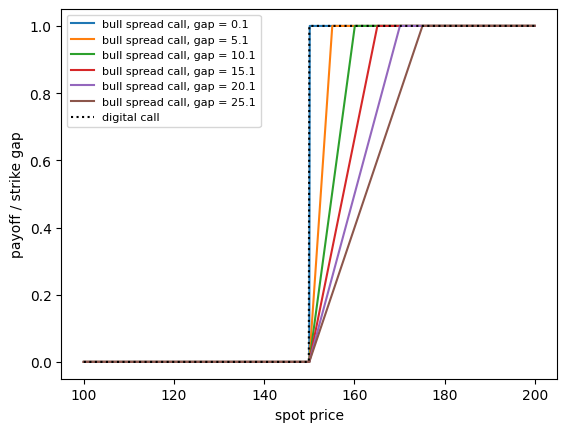

In [6]:
# plot results
for g in range(len(gaps)):
    plt.plot(SpotPrices, payoffs_bullspread[g] / gaps[g], "-", color = colors[g], label = "bull spread call, gap = " + str(gaps[g]))
plt.plot(SpotPrices, payoff_digital[0] / gaps[0], ":", color = "k", label = "digital call")

plt.legend(loc = 2, fontsize = 8)

plt.xlabel("spot price")
plt.ylabel("payoff / strike gap")